1. Determine all the variable types and find the fraction of the missing values for each variable.
2. Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?
3. Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.
4. This time, fill in the missing values using interpolation (extrapolation).
5. Compare your results for the 2nd, 3rd, and 4th questions. Do you find any meaningful differences?

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

useducation_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [5]:
useducation_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


## 1.a Determine all variable types...

In [6]:
useducation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

##  1.b Find the fraction of the missing values for each variable

In [8]:
useducation_df.isnull().sum()*100/useducation_df.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

## 2. Choose strategy to deal with missing values for each variables (not taking time into consideration).  Which would we fill in?  Which would we throw out?

* Enroll:
* Total_Revenue
* State Revenue
* Local_Revenue

In [9]:
education2_df = useducation_df.copy()

fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
             "GRADES_9_12_G", "GRADES_ALL_G"]

# Little pro-tip: always avoid inplace operations in Pandas. Inplace operations might work on copies not referencing the original dataframe
# and you end up with no changes in the original dataframe. 
# Most places where you do that end up with a `SettingWithCopy Warning`, but in this case, it isn't easily detectable.
# There are some Github issues about that problem: 
# https://github.com/pandas-dev/pandas/issues/14858
# https://github.com/pandas-dev/pandas/issues/11984
# https://github.com/pandas-dev/pandas/issues/10342 (this one is the easiest to understand)

# For example, this doesn't work:
# for col in fill_list:
#     education2_df.loc[:, col].fillna(education2_df.loc[:, col].mean(), inplace=True)

# But this does:
for col in fill_list:
    education2_df.loc[:, col] = education2_df.loc[:, col].fillna(education2_df.loc[:, col].mean())

In [10]:
education2_df.isnull().sum()*100/education2_df.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           0.000000
TOTAL_REVENUE                    0.000000
FEDERAL_REVENUE                  0.000000
STATE_REVENUE                    0.000000
LOCAL_REVENUE                    0.000000
TOTAL_EXPENDITURE                0.000000
INSTRUCTION_EXPENDITURE          0.000000
SUPPORT_SERVICES_EXPENDITURE     0.000000
OTHER_EXPENDITURE                0.000000
CAPITAL_OUTLAY_EXPENDITURE       0.000000
GRADES_PK_G                      0.000000
GRADES_KG_G                      0.000000
GRADES_4_G                       0.000000
GRADES_8_G                       0.000000
GRADES_12_G                      0.000000
GRADES_1_8_G                     0.000000
GRADES_9_12_G                    0.000000
GRADES_ALL_G                     0.000000
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

## 3. Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.

In [11]:
education3_df = useducation_df.copy()

years = education3_df["YEAR"].unique()

for col in fill_list:
    for year in years:
        education3_df.loc[education3_df["YEAR"] == year, col] = education3_df.loc[education3_df["YEAR"] == year, col].fillna(
            education3_df[education3_df["YEAR"] == year][col].mean())

In [12]:
education3_df.isnull().sum()*100/education3_df.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           7.171582
TOTAL_REVENUE                    3.418231
FEDERAL_REVENUE                  3.418231
STATE_REVENUE                    3.418231
LOCAL_REVENUE                    3.418231
TOTAL_EXPENDITURE                3.418231
INSTRUCTION_EXPENDITURE          3.418231
SUPPORT_SERVICES_EXPENDITURE     3.418231
OTHER_EXPENDITURE                7.171582
CAPITAL_OUTLAY_EXPENDITURE       3.418231
GRADES_PK_G                      6.836461
GRADES_KG_G                      6.836461
GRADES_4_G                       6.836461
GRADES_8_G                       6.836461
GRADES_12_G                      6.836461
GRADES_1_8_G                     6.836461
GRADES_9_12_G                    6.836461
GRADES_ALL_G                     6.836461
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

## 4. This time, fill in the missing values using interpolation (extrapolation).

Note that, by default, interpolation works only works in a forward fashion. So, for example, in the column ENROLL, which has a NaN for its first value, will *still* have a NaN. To solve this issue, you need to add the argument `limit_direction='both'`

In [13]:
education4_df = useducation_df.copy()

for col in fill_list:
    education4_df.loc[:, col] = education4_df.loc[:, col].interpolate()

## 5. Compare your results for the second, third and the fourth questions. Do you find any meaningful differences?

In [15]:
for col in fill_list:
    print("Statistics for columns: {}".format(col))
    print(pd.concat([useducation_df[col], education2_df[col],
                     education3_df[col], education4_df[col]], axis=1).describe())

Statistics for columns: ENROLL
             ENROLL        ENROLL        ENROLL        ENROLL
count  1.229000e+03  1.492000e+03  1.385000e+03  1.456000e+03
mean   9.159308e+05  9.159308e+05  9.161654e+05  1.005984e+06
std    1.065280e+06  9.667725e+05  1.003532e+06  1.009158e+06
min    4.386600e+04  4.386600e+04  4.386600e+04  4.386600e+04
25%    2.583140e+05  3.150940e+05  2.867590e+05  2.973995e+05
50%    6.483130e+05  8.204140e+05  7.374010e+05  7.540845e+05
75%    1.014528e+06  9.211780e+05  9.624880e+05  1.595024e+06
max    6.307022e+06  6.307022e+06  6.307022e+06  6.307022e+06
Statistics for columns: TOTAL_REVENUE
       TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE
count   1.280000e+03   1.492000e+03   1.441000e+03   1.492000e+03
mean    9.092082e+06   9.092082e+06   9.084108e+06   1.111164e+07
std     1.174519e+07   1.087818e+07   1.110204e+07   1.200155e+07
min     4.656500e+05   4.656500e+05   4.656500e+05   4.656500e+05
25%     2.186305e+06   2.546261e+06   2.425

         GRADES_PK_G    GRADES_PK_G    GRADES_PK_G    GRADES_PK_G
count    1319.000000    1492.000000    1390.000000    1492.000000
mean    17601.614102   17601.614102   17672.581838   15926.059316
std     30016.166447   28221.111094   29263.483252   28669.479212
min         0.000000       0.000000       0.000000       0.000000
25%      2021.000000    2449.000000    2183.250000    1544.000000
50%      8106.000000   10505.000000    9066.500000    5910.500000
75%     22295.000000   19149.250000   22788.750000   19561.000000
max    250911.000000  250911.000000  250911.000000  250911.000000
Statistics for columns: GRADES_KG_G
         GRADES_KG_G    GRADES_KG_G    GRADES_KG_G    GRADES_KG_G
count    1360.000000    1492.000000    1390.000000    1492.000000
mean    63746.761029   63746.761029   63810.167724   59021.465818
std     80205.138143   76572.547833   79336.993597   78271.025323
min       544.000000     544.000000     544.000000     544.000000
25%     11745.000000   14016.000000   11

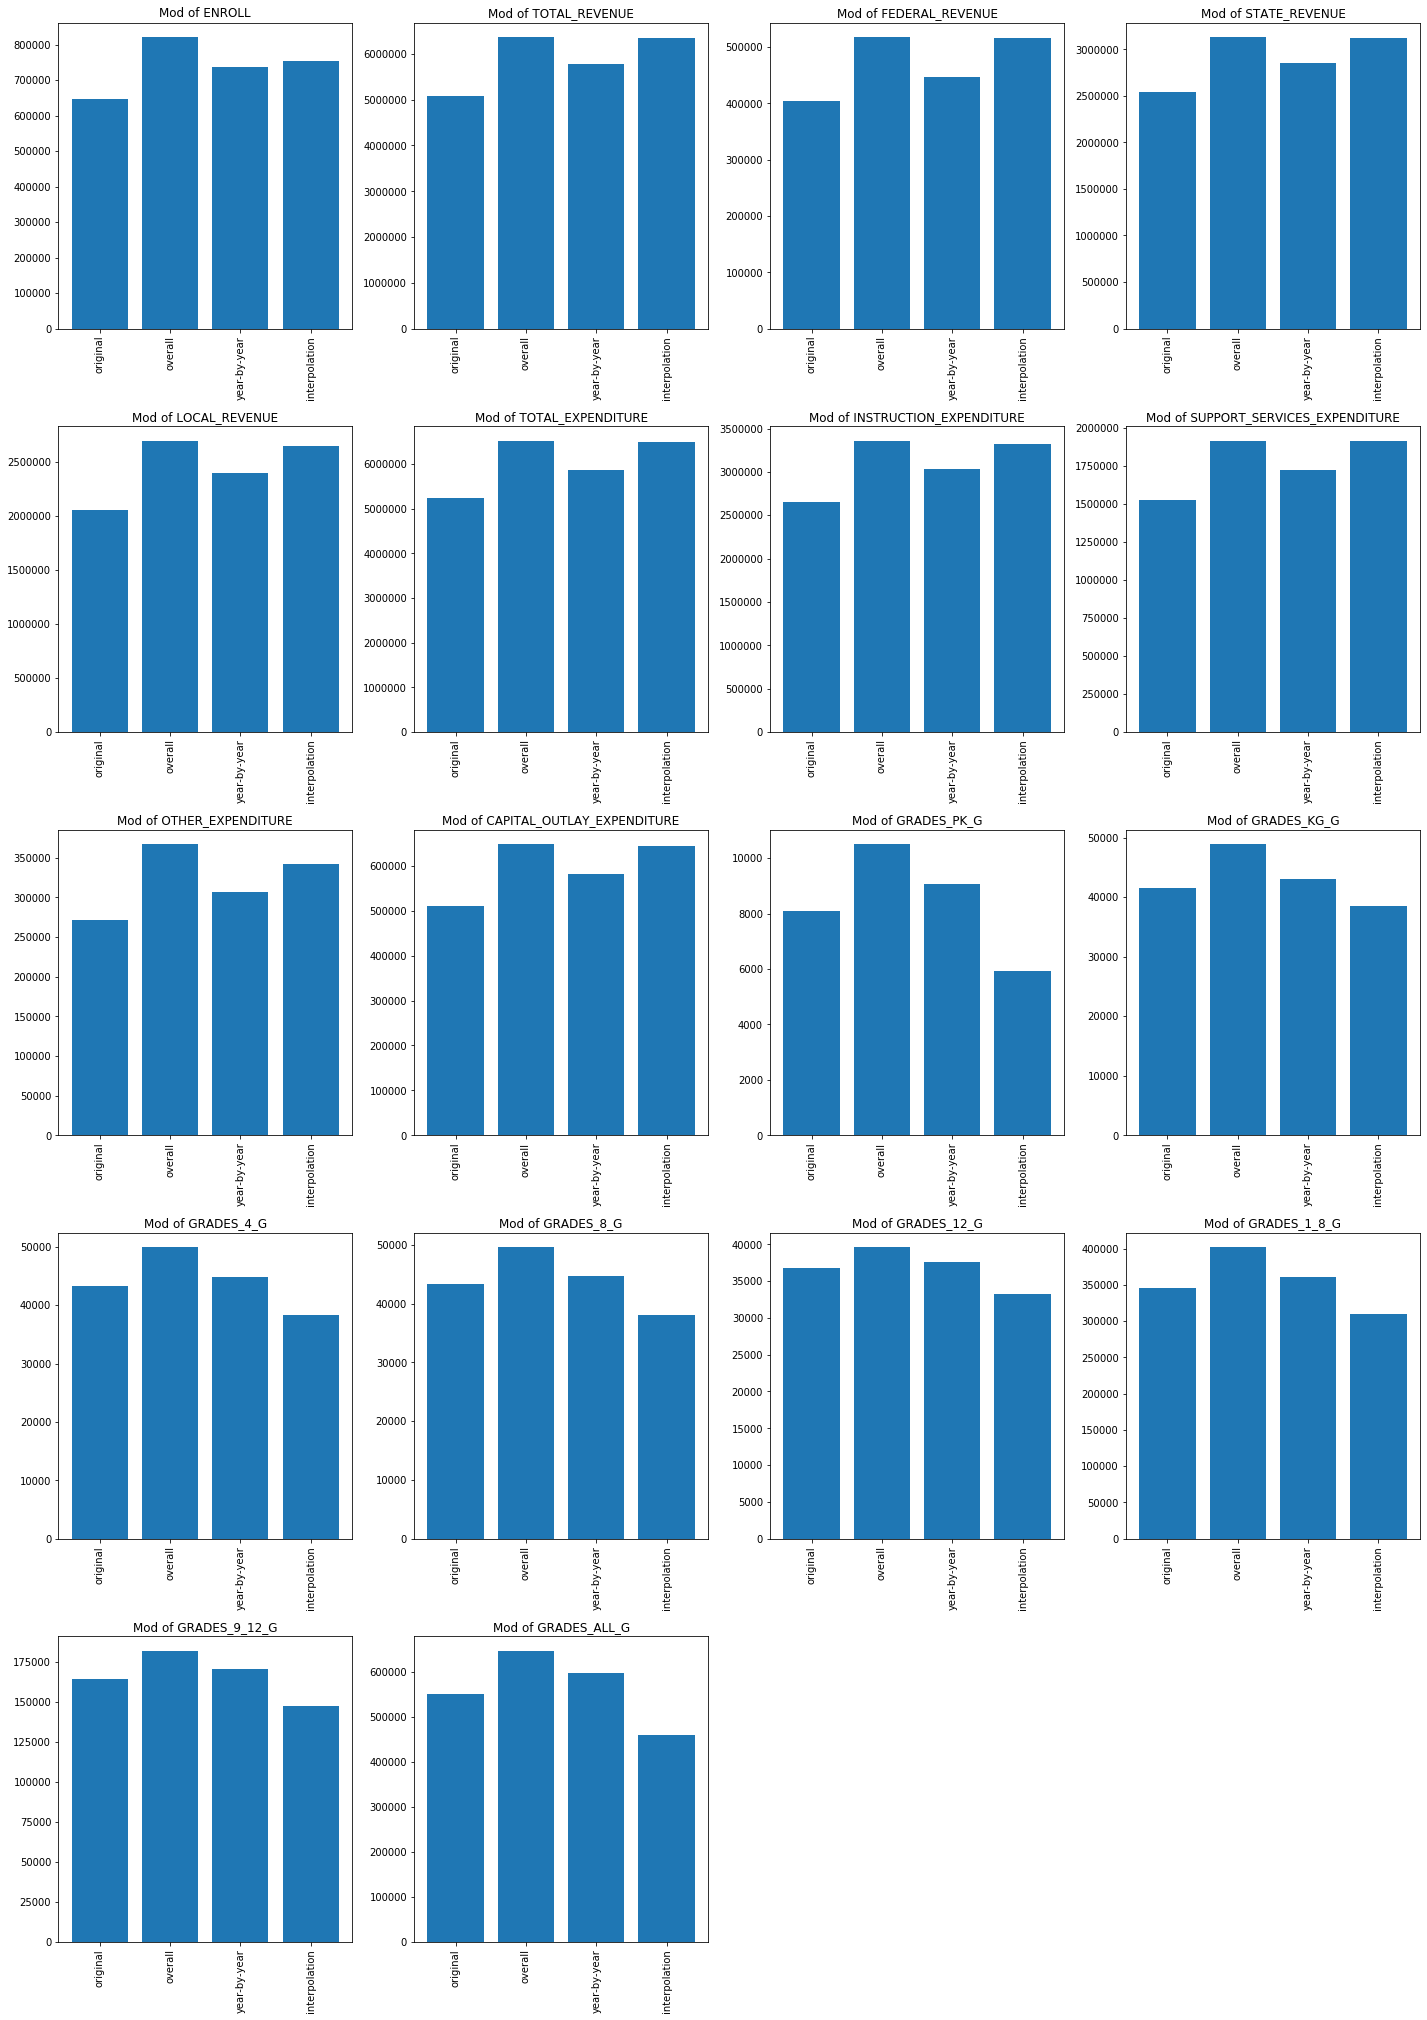

In [19]:
fig = plt.figure(figsize=(20,100))

for i, col in enumerate(fill_list):
    df = pd.concat([useducation_df[col], education2_df[col],
                     education3_df[col], education4_df[col]], axis=1)
    
    plt.subplot(len(fill_list), 4, i+1)
    plt.bar(["original", "overall", "year-by-year", "interpolation"], df.median())
    plt.xticks(rotation='vertical')
    plt.title("Mod of {}".format(col))
    
plt.tight_layout()
plt.show()